#### Pasos a seguir

1. Importar las librerías (data)
2. Exploración de los datos
3. Limpieza de datos
4. Regresión lineal
5. Evaluación del resultado


#### 1. Importar las librerías (data)

In [1]:
#importo las librerías

import pandas as pd
import numpy as np

#visualizacion
import seaborn as sns
import matplotlib.pyplot as plt

#test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
# Lee el csv correspondiente

df = pd.read_csv('data/measurements.csv')

In [3]:
df.shape

(388, 12)

In [4]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


#### 2. Exploración de los datos

In [5]:
df['specials'].isnull().sum()

295

In [6]:
df['refill liters'].isnull().sum()

375

In [7]:
df['refill gas'].isnull().sum()

375

In [8]:
print(df.gas_type.unique())
print(df['refill gas'].unique())
print(df.specials.unique())

['E10' 'SP98']
['E10' nan 'SP98']
[nan 'AC rain' 'AC' 'rain' 'snow' 'AC snow' 'half rain half sun' 'sun'
 'AC sun' 'sun ac' 'ac' 'AC Sun' 'ac rain']


In [9]:
print(type(df.temp_inside[0]))
print(type(df.consume[0]))
print(type(df.distance[0]))
print(type(df['refill liters'][0]))


<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [10]:
df.temp_inside = df.temp_inside.str.replace(',', '.').astype(float)
df.consume = df.consume.str.replace(',', '.').astype(float)
df.distance = df.distance.str.replace(',', '.').astype(float)
df['refill liters'] = df['refill liters'].str.replace(',', '.').astype(float)

In [11]:
print(type(df.temp_inside[0]))
print(type(df.consume[0]))
print(type(df.distance[0]))
print(type(df['refill liters'][0]))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


In [12]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45.0,E10
1,12.0,4.2,30,21.5,13,NaN,E10,0,0,0,NaN,NaN
2,11.2,5.5,38,21.5,15,NaN,E10,0,0,0,NaN,NaN
3,12.9,3.9,36,21.5,14,NaN,E10,0,0,0,NaN,NaN
4,18.5,4.5,46,21.5,15,NaN,E10,0,0,0,NaN,NaN


In [13]:
# revisamos valores nulos

df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

#### 3. Limpieza de datos

In [14]:
# Eliminar columnas con menos de 100 no nulos

df.drop(['specials', 'refill liters', 'refill gas'], axis=1, inplace=True)

In [15]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [16]:
media_ti = df['temp_inside'].mean()

In [17]:
# Rellena los valores nulos con la media
df['temp_inside'].fillna(media_ti, inplace=True)

In [18]:
df.isnull().sum()

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [19]:
#Visualización

#Medias de consume, speed y distance para cada gas_type
media_consumo = df.groupby('gas_type')[['consume', 'speed', 'distance']].mean()


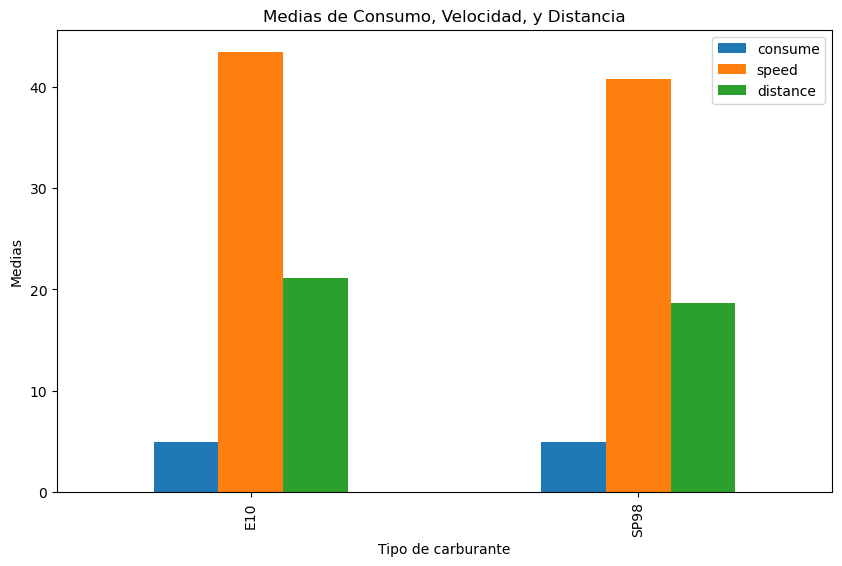

           consume      speed   distance
gas_type                                
E10       4.931250  43.506250  21.096250
SP98      4.899123  40.820175  18.639912


In [20]:
#Dibujo
media_consumo.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Tipo de carburante')
plt.ylabel('Medias')
plt.title('Medias de Consumo, Velocidad, y Distancia')
plt.legend()
plt.show()

#Valores
print(media_consumo)


In [21]:
df.describe()

,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
count,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000,388.000000
mean,19.652835,4.912371,41.927835,21.929521,11.358247,0.077320,0.123711,0.082474
std,22.667837,1.033172,13.598524,0.994666,6.991542,0.267443,0.329677,0.275441
min,1.300000,3.300000,14.000000,19.000000,-5.000000,0.000000,0.000000,0.000000
25%,11.800000,4.300000,32.750000,21.500000,7.000000,0.000000,0.000000,0.000000
50%,14.600000,4.700000,40.500000,22.000000,10.000000,0.000000,0.000000,0.000000
75%,19.000000,5.300000,50.000000,22.500000,16.000000,0.000000,0.000000,0.000000
max,216.100000,12.200000,90.000000,25.500000,31.000000,1.000000,1.000000,1.000000


In [22]:
#Function to change the gas_type column string values to integer, then they can be used in the ML section.

def gas_type_int(gas_type):
    gas_type_map = {'E10': 0, 'SP98': 1}
    return gas_type_map[gas_type]

# Apply the function to the 'gas_type' column
df['gas_type'] = df['gas_type'].apply(gas_type_int)


In [23]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,0,0,0,0
1,12.0,4.2,30,21.5,13,0,0,0,0
2,11.2,5.5,38,21.5,15,0,0,0,0
3,12.9,3.9,36,21.5,14,0,0,0,0
4,18.5,4.5,46,21.5,15,0,0,0,0


In [24]:
np.mean(df['temp_inside'])

21.929521276595747

In [25]:
#Calculating a delta T column to see the difference between the inside and outer temperature

df['dif_temp'] = df['temp_inside']- df['temp_outside']

In [26]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,dif_temp
0,28.0,5.0,26,21.5,12,0,0,0,0,9.5
1,12.0,4.2,30,21.5,13,0,0,0,0,8.5
2,11.2,5.5,38,21.5,15,0,0,0,0,6.5
3,12.9,3.9,36,21.5,14,0,0,0,0,7.5
4,18.5,4.5,46,21.5,15,0,0,0,0,6.5


<Axes: >

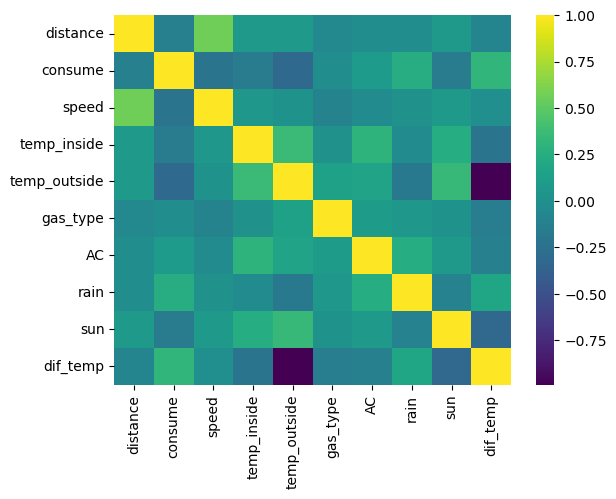

In [27]:
sns.heatmap(df.corr(),cmap='viridis')

In [28]:
df.corr().consume.sort_values(ascending=False)

consume         1.000000
dif_temp        0.310991
rain            0.248118
AC              0.096591
gas_type       -0.015327
distance       -0.128967
temp_inside    -0.160623
sun            -0.170667
speed          -0.227866
temp_outside   -0.320811
Name: consume, dtype: float64

#### 4. REGRESIÓN LINEAL: ANÁLISIS PREDICTIVO

In [29]:
#Preparación de los datos

columnas_numericas = ['distance', 'speed', 'temp_inside', 'temp_outside', 'temp_outside', 'AC', 'rain', 'sun']
X = pd.concat([df, df[columnas_numericas]], axis=1)
y = df['consume']

In [30]:
#Divide datos para entrenamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)     #Entrena el modelo

LinearRegression()

In [32]:
#Predicciones
y_pred = model.predict(X_test)

In [33]:
#Evaluación del modelo

mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

In [34]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 4.4927145592538973e-29
R-squared: 1.0


In [35]:
mae = mean_absolute_error(y_test, y_pred) 

In [36]:
print("MAE",mae)

MAE 5.4372460949590996e-15


In [37]:
rmse = np.sqrt(mse)
print("RMSE", rmse)

RMSE 6.702771485925726e-15
